In [118]:
import pandas as pd
import matplotlib.pyplot as plt

In [119]:
%matplotlib inline

In [120]:
pd.options.display.max_rows  # nr max de linhas exibidas

60

In [121]:
pd.options.display.max_columns = 37  # nr max de colunas exibidas

In [122]:
# open csv file
arquivo_csv = 'dados.csv'

original = pd.read_csv(arquivo_csv, ';')

In [123]:
df = original.copy()

In [124]:
#linhas e colunas
df.shape

(1011, 37)

In [125]:
#TRATAMENTO DOS DADOS

In [126]:
#drop all the columns where all the data is empty
df = df.dropna(how='all', axis='columns')

In [127]:
#Remove unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [128]:
#Deleta Quadrantes e Numeros nulos
df.dropna(subset=['Quadrante', 'Número'], inplace=True)

In [129]:
#Deleta especies Pendentes 
df.drop(df[df['Espécie'] == 'Pendente'].index, inplace=True)

In [130]:
df.shape

(190, 16)

In [131]:
df.head()

,Data,Palmeira,Altura Palmeira (m),Área,Quadrante,Número,Família,Gênero,Espécie,Altura (cm),Dap (mm),Coletada,Nativa,Estágio sucessional,Obs,Identificação
1,29/11/2019,1.0,3.0,Copa,2.0,2,Rubiaceae,Coffea,Coffea arabica,34.0,"3,00",N,N,NaN,NaN,OK
2,29/11/2019,1.0,3.0,Copa,2.0,3,Rubiaceae,Coffea,Coffea arabica,29.0,"4,50",N,N,NaN,NaN,OK
3,29/11/2019,1.0,3.0,Copa,2.0,4,Sapindaceae,Cupania,Cupania oblongifolia,58.0,"5,40",N,S,Pioneira,NaN,OK
4,29/11/2019,1.0,3.0,Copa,2.0,5,Sapindaceae,Cupania,Cupania oblongifolia,164.0,"10,80",N,S,Pioneira,NaN,OK
5,29/11/2019,1.0,3.0,Copa,2.0,6,Rubiaceae,Coffea,Coffea arabica,23.0,"3,00",N,N,NaN,NaN,OK


In [132]:
#tipos de dados das colunas
print(df.dtypes)

Data                    object
Palmeira               float64
Altura Palmeira (m)    float64
Área                    object
Quadrante              float64
Número                  object
Família                 object
Gênero                  object
Espécie                 object
Altura (cm)            float64
Dap (mm)                object
Coletada                object
Nativa                  object
Estágio sucessional     object
Obs                     object
Identificação           object
dtype: object


In [133]:
#Ajustando os tipos de dados

df['Estágio sucessional'] = df['Estágio sucessional'].astype(str)
df['Nativa'] = df['Nativa'].astype(str)
df['Espécie'] = df['Espécie'].astype('str')
df['Gênero'] = df['Gênero'].astype(str)
df['Família'] = df['Família'].astype(str)
df['Quadrante'] = df['Quadrante'].astype(str)
df['Área'] = df['Área'].astype('category')
df['Altura Palmeira (m)'] = df['Altura Palmeira (m)'].astype(str)
df['Palmeira'] = df['Palmeira'].astype(str)
df['Dap (mm)'] = df['Dap (mm)'].astype(str)

#troca , por . no na coluna dap
df['Dap (mm)'] = df['Dap (mm)'].apply(lambda x: x.replace(',', '.'))
df['Dap (mm)'] = df['Dap (mm)'].astype('float64')



In [134]:
#tipos de dados ajustados
print(df.dtypes)

Data                     object
Palmeira                 object
Altura Palmeira (m)      object
Área                   category
Quadrante                object
Número                   object
Família                  object
Gênero                   object
Espécie                  object
Altura (cm)             float64
Dap (mm)                float64
Coletada                 object
Nativa                   object
Estágio sucessional      object
Obs                      object
Identificação            object
dtype: object


In [135]:
df.head()

,Data,Palmeira,Altura Palmeira (m),Área,Quadrante,Número,Família,Gênero,Espécie,Altura (cm),Dap (mm),Coletada,Nativa,Estágio sucessional,Obs,Identificação
1,29/11/2019,1.0,3.0,Copa,2.0,2,Rubiaceae,Coffea,Coffea arabica,34.0,3.0,N,N,nan,NaN,OK
2,29/11/2019,1.0,3.0,Copa,2.0,3,Rubiaceae,Coffea,Coffea arabica,29.0,4.5,N,N,nan,NaN,OK
3,29/11/2019,1.0,3.0,Copa,2.0,4,Sapindaceae,Cupania,Cupania oblongifolia,58.0,5.4,N,S,Pioneira,NaN,OK
4,29/11/2019,1.0,3.0,Copa,2.0,5,Sapindaceae,Cupania,Cupania oblongifolia,164.0,10.8,N,S,Pioneira,NaN,OK
5,29/11/2019,1.0,3.0,Copa,2.0,6,Rubiaceae,Coffea,Coffea arabica,23.0,3.0,N,N,nan,NaN,OK


In [136]:
#new shape
df.shape

(190, 16)

In [137]:
#Ajuste valores ausentes nas colunas Estágio Sucessional e Nativa 
df['Estágio sucessional'] =  df['Estágio sucessional'].apply(lambda x: x.replace('nan', 'indeterminado'))
df['Estágio sucessional'] =  df['Estágio sucessional'].fillna('indeterminado')
df['Nativa'] =  df['Nativa'].apply(lambda x: x.replace('nan', 'indeterminado'))
df['Nativa'] =  df['Nativa'].fillna('indeterminado')

In [138]:
#Ajustar Area externa para 'Entorno'
df['Área'] =  df['Área'].apply(lambda x: x.replace('Externo', 'Entorno'))

In [139]:
#Remove decimal do nome da palmeira e da altura da palmeira 
df['Palmeira'] = df['Palmeira'].apply(lambda x: x.split('.')[0]) 
df['Altura Palmeira (m)'] = df['Altura Palmeira (m)'].apply(lambda x: x.split('.')[0]) 

In [140]:
df.head(190)

,Data,Palmeira,Altura Palmeira (m),Área,Quadrante,Número,Família,Gênero,Espécie,Altura (cm),Dap (mm),Coletada,Nativa,Estágio sucessional,Obs,Identificação
1,29/11/2019,1,3,Copa,2.0,2,Rubiaceae,Coffea,Coffea arabica,34.0,3.00,N,N,indeterminado,NaN,OK
2,29/11/2019,1,3,Copa,2.0,3,Rubiaceae,Coffea,Coffea arabica,29.0,4.50,N,N,indeterminado,NaN,OK
3,29/11/2019,1,3,Copa,2.0,4,Sapindaceae,Cupania,Cupania oblongifolia,58.0,5.40,N,S,Pioneira,NaN,OK
4,29/11/2019,1,3,Copa,2.0,5,Sapindaceae,Cupania,Cupania oblongifolia,164.0,10.80,N,S,Pioneira,NaN,OK
5,29/11/2019,1,3,Copa,2.0,6,Rubiaceae,Coffea,Coffea arabica,23.0,3.00,N,N,indeterminado,NaN,OK
6,29/11/2019,1,3,Copa,2.0,7,Sapindaceae,Cupania,Cupania oblongifolia,39.0,6.30,N,S,Pioneira,NaN,OK
7,29/11/2019,1,3,Copa,2.0,8,Indeterminada 5,Indeterminada 5,Indeterminada 5,35.0,6.10,S,indeterminado,indeterminado,NaN,NaN
8,29/11/2019,1,3,Copa,2.0,9,Rubiaceae,Coffea,Coffea arabica,85.0,14.20,N,N,indeterminado,NaN,OK
9,29/11/2019,1,3,Copa,2.0,10,Myrtaceae,Myrciaria,Myrciaria floribunda,300.0,32.00,S,S,Não Pioneira,NaN,OK
11,29/11/2019,1,3,Copa,4.0,11,Sapindaceae,Cupania,Cupania oblongifolia,25.0,5.70,N,S,Pioneira,NaN,OK


In [141]:
#contar registros em cada grupo
df['Área'].value_counts()

Entorno    135
Copa        55
Name: Área, dtype: int64

In [142]:
#contar registros em cada coluna - área da copa
df[df['Área'] == 'Copa'].count()

Data                   55
Palmeira               55
Altura Palmeira (m)    55
Área                   55
Quadrante              55
Número                 55
Família                55
Gênero                 55
Espécie                55
Altura (cm)            55
Dap (mm)               55
Coletada               55
Nativa                 55
Estágio sucessional    55
Obs                     1
Identificação          51
dtype: int64

In [143]:
#contar registros em cada coluna - área do entorno
df[df['Área'] == 'Entorno'].count()

Data                   135
Palmeira               135
Altura Palmeira (m)    135
Área                   135
Quadrante              135
Número                 135
Família                135
Gênero                 135
Espécie                135
Altura (cm)            135
Dap (mm)               135
Coletada               135
Nativa                 135
Estágio sucessional    135
Obs                     14
Identificação          119
dtype: int64

In [144]:
#STATISTICAS

In [145]:
#Altura
df['Altura (cm)'].describe()

count    190.000000
mean      75.442105
std       78.145870
min        5.000000
25%       30.500000
50%       48.000000
75%       84.500000
max      600.000000
Name: Altura (cm), dtype: float64

In [146]:
df['Dap (mm)'].describe()

count    190.000000
mean       8.991316
std       10.036956
min        1.450000
25%        3.600000
50%        5.950000
75%        9.725000
max       68.700000
Name: Dap (mm), dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f33b06c4390>,
      dtype=object)

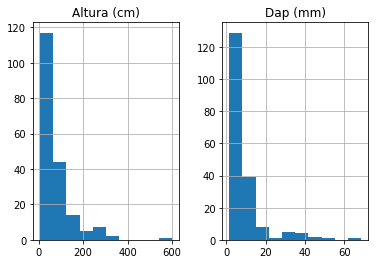

In [147]:
#histogramas das colunas numericas (Altura e Dap)
df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f33b0aae6a0>,
      dtype=object)

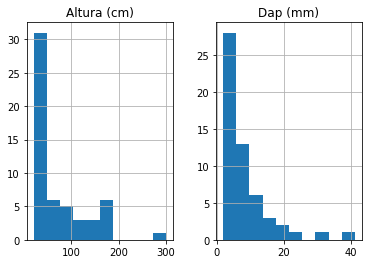

In [148]:
#histograma da altura e do dap da área da copa
df[df['Área'] == 'Copa'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f33b052aa90>,
      dtype=object)

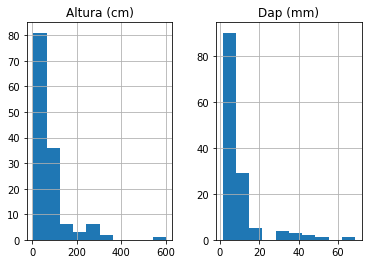

In [149]:
#histograma da altura e do dap do entorno
df[df['Área'] == 'Entorno'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f33b04b1f98>,
      dtype=object)

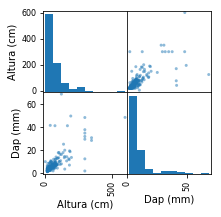

In [150]:
# exibe relacionamentos entre os atributos numericos 
from pandas.plotting import scatter_matrix

#figsize: tamanho da figura
#alpha: transparencia
scatter_matrix(df, alpha=0.5, figsize=(3, 3))



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f33aeb03e80>,
      dtype=object)

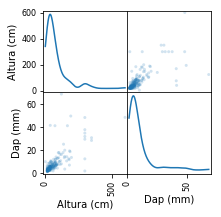

In [151]:
#KDE is a non-parametric way to estimate the probability density function of any variable we wish to view.
scatter_matrix(df, alpha=0.2, figsize=(3, 3), diagonal='kde')

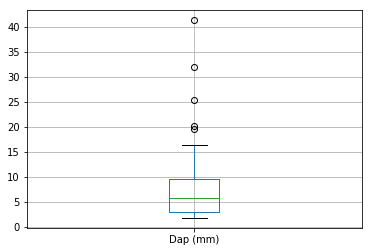

In [152]:
#box plot do dap do grupo copa
df[df['Área'] == 'Copa'].boxplot(column=['Dap (mm)'])

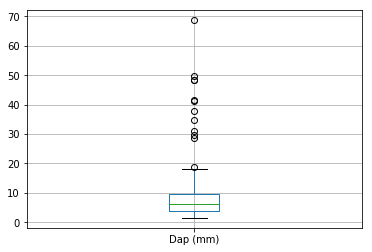

In [153]:
#box plot do dap do grupo entorno
df[df['Área'] == 'Entorno'].boxplot(column=['Dap (mm)'])

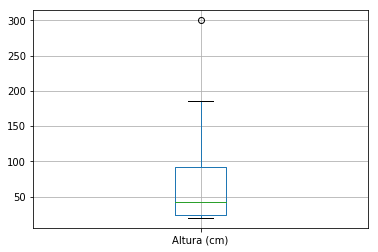

In [154]:
#box plot da altura do grupo copa
df[df['Área'] == 'Copa'].boxplot(column=['Altura (cm)'])

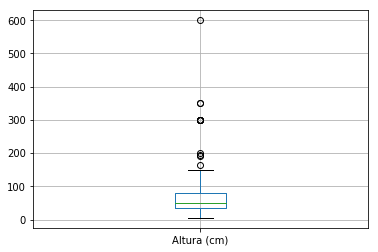

In [155]:
#box plot da altura do grupo entorno
df[df['Área'] == 'Entorno'].boxplot(column=['Altura (cm)'])

In [156]:
# media das alturas de cada grupo
df.groupby('Área')['Altura (cm)'].mean()

Área
Copa       69.400000
Entorno    77.903704
Name: Altura (cm), dtype: float64

In [157]:
# agrupar por grupo e altura minima
df.groupby('Área')['Altura (cm)'].min()

Área
Copa       20.0
Entorno     5.0
Name: Altura (cm), dtype: float64

In [158]:
#agrupar por grupo e altura max
df.groupby('Área')['Altura (cm)'].max()

Área
Copa       300.0
Entorno    600.0
Name: Altura (cm), dtype: float64

Text(0,0.5,'Quantidade')

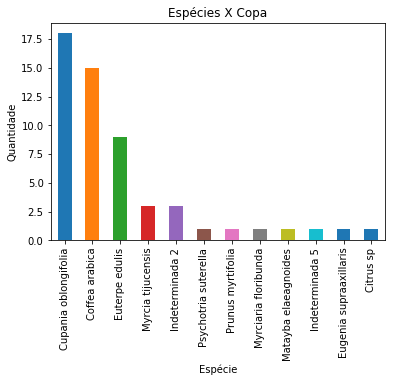

In [159]:
#Gráfico de barras da area das especies da area da copa ordenadas de forma descendente
plot_copa = df[df['Área'] == 'Copa']
plot_copa =  plot_copa[~plot_copa['Espécie'].isin(['Pendente'] )]
plot_copa = plot_copa.groupby('Espécie')['Número'].count() 
plot_copa = plot_copa[plot_copa > 0]
plot_copa = plot_copa.sort_values(ascending = False)

plot_copa.plot(kind='bar')
plt.title ("Espécies X Copa")
plt.ylabel("Quantidade")

Text(0,0.5,'Quantidade')

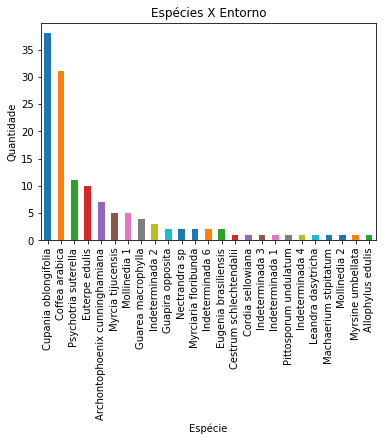

In [160]:
#Gráfico de barras da area das especies da area do entorno ordenadas de forma descendente
plot_entorno = df[['Área','Espécie','Número']]
plot_entorno= plot_entorno[plot_entorno['Área'] == 'Entorno']
plot_entorno = plot_entorno.groupby('Espécie')['Número'].count()
plot_entorno = plot_entorno[ plot_entorno > 0 ]
plot_entorno = plot_entorno.sort_values(ascending = False)

plot_entorno.plot(kind='bar')
plt.title ("Espécies X Entorno")
plt.ylabel("Quantidade")

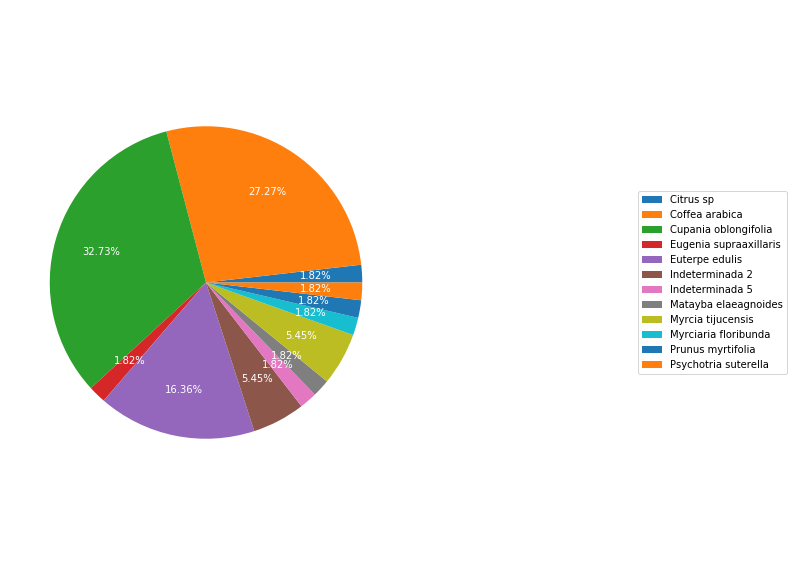

In [161]:
# Grafico de pizza da area da especies da area da copa
import matplotlib.pyplot as plt

plot_copa = df[df['Área'] == 'Copa']
plot_copa =  plot_copa[~plot_copa['Espécie'].isin(['Pendente'] )]
plot_copa = plot_copa.groupby('Espécie')['Número'].count() 
plot_copa = plot_copa[plot_copa > 0]

labels = plot_copa.groupby('Espécie').groups.keys()
sizes =  plot_copa

fig, ax = plt.subplots(figsize=(7, 10))
ax.axis('equal')

pie = ax.pie(sizes, autopct='%1.2f%%', pctdistance =0.7,textprops=dict(color="w"))

plt.legend(pie[0],labels, bbox_to_anchor=(2,0.5), loc="center right")

plt.show()



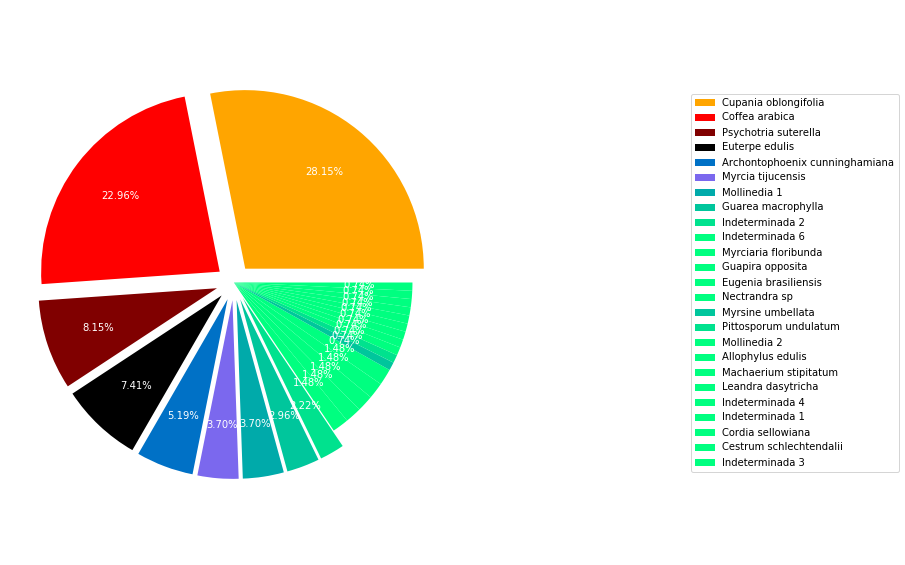

In [162]:
# Grafico de pizza om cores personalizadas relativo as especies da area da copa 

entorno = df[df['Área'] == 'Entorno']
entorno = entorno[~entorno['Espécie'].isin(['Pendente'] )]
entorno = entorno.groupby('Espécie', as_index=False)['Número'].count() 
entorno = entorno[entorno > 0]
entorno = entorno.sort_values(by='Número',ascending = False)
entorno = entorno.dropna()

labels = entorno['Espécie'].tolist()

sizes =  entorno['Número'].tolist()

explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0]

colors = ['#FFA500', '#FF0000', '#800000', '#000000', '#0071C6', '#7B68EE', '#00AAAA',
          '#00C69C', '#00E28E', '#00FF80', '#00FF80','#00FF80' , '#00FF80', '#00FF80',
          '#00C69C', '#00E28E', '#00FF80', '#00FF80','#00FF80' , '#00FF80', '#00FF80',
          '#00FF80','#00FF80' , '#00FF80', '#00FF80']

fig, ax = plt.subplots(figsize=(8, 10))
ax.axis('equal')

pie = ax.pie(sizes, explode=explode, colors=colors,
             autopct='%1.2f%%', pctdistance =0.7,textprops=dict(color="w"))

plt.legend(pie[0],labels, bbox_to_anchor=(2,0.5), loc="center right")

plt.show()
